<a href="https://colab.research.google.com/github/YugyeongJo/Movie-Dataset_Analysis_Project/blob/Chang-Hyeon-Park/data_analysis/Chang/Analysis_Files/The_Story_of_Film_07_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Story of Film**

https://www.kaggle.com/code/rounakbanik/the-story-of-film/notebook  


The birth of the Motion Picture Camera in the late 18th century gave birth to possibly the most potent form of entertainment in existence: Cinema. Movies have managed to enthrall audiences ever since one second clips of racing horses emerged in the 1890s to the introduction of sound in the 1920s to the birth of color in the 1930s to mainstream 3D Movies in the early 2010s.

Cinema had humble origins in terms of plot, direction and acting (mainly due to its extremely short duration in its early days) but since then, movie industries around the world have been blessed with creative geniuses in the form of directors, screenwriters, actors, sound designers and cinematographers. It has also spread itself into a plethora of genres ranging from romance to comedy to science fiction to horror.

As with almost every kid born in the last century, I was amazed by movies. I was addicted to it. And I've always wanted to know more about the enigmatic world of cinema. In this notebook, I will try and gain some insights using data. With us, we have a dataset of about 45000 movies with metadata collected from TMDB. Using this data, we will try and answer various questions that I've always had about movies.  

  

## In this notebook, I will also try and build the following:

 - A Regressor that can, to a certain degree, predict the revenue of a particular movie.
 - A Classifier that identifies if a movie will be a hit or will make the producers lose money.

-----------------


 18세기 후반에 탄생한 영화 촬영 카메라는 아마도 가장 강력한 형태의 오락인 '영화'를 탄생시켰습니다. 1890년대 경주마의 1초짜리 클립에서 1920년대에 사운드가 도입되고, 1930년대에 컬러 영화가 탄생하며, 2010년대 초반에 주류 3D 영화가 등장하기까지 영화는 관객들을 매료시키는 데 성공했습니다.

영화는 줄거리, 연출, 연기 면에서 겸손한 시작을 했습니다(주로 초기 영화의 매우 짧은 길이 때문이었음). 하지만 그 이후로 전 세계의 영화 산업은 감독, 시나리오 작가, 배우, 음향 디자이너, 촬영 감독과 같은 창의적인 천재들로 축복받았습니다. 또한, 로맨스, 코미디, 공상 과학, 공포 등 다양한 장르로 확장되었습니다.

지난 세기에 태어난 거의 모든 아이들과 마찬가지로, 저도 영화에 매료되었습니다. 저는 영화에 중독되었습니다. 그리고 저는 항상 영화의 신비로운 세계에 대해 더 알고 싶어 했습니다. 이 노트북에서는 데이터를 사용하여 몇 가지 통찰력을 얻고자 합니다. 우리에게는 TMDB에서 수집한 약 45,000편의 영화 메타데이터가 있는 데이터셋이 있습니다. 이 데이터를 사용하여 제가 항상 궁금해했던 다양한 질문에 답해보려고 합니다.

## 이 노트북에서는 다음과 같은 작업도 시도해 보겠습니다:

 - 특정 영화의 수익을 어느 정도 예측할 수 있는 회귀 모델
 - 영화가 히트할지 아니면 제작자에게 손해를 입힐지 식별하는 분류 모델

In [ ]:
# %matplotlib inline # matplotlib으로 생성한 그래프를 노트북의 셀 안에 인라인으로 표시해주는 것
                   # Colab에서는 어짜피 바로 보여주니까 굳이 필요 없음
from IPython.display import Image, HTML # Image와 HTML콘턴츠 표시하는 데 사용
import json
import datetime
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
from wordcloud import WordCloud, STOPWORDS
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
# plotly.tools.set_credentials_file(username = 'rounakbanik', api_key = 'xTLaHBy9MVv5szF4Pwan') # 이녀석 api_key를 캐글에 올려?

sns.set_style('whitegrid')
sns.set(font_scale=1.25)
pd.set_option('display.max_colwidth', 50)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SeSAC/Mini_Project/data/original_movie_data/movies_metadata.csv')
df.head().transpose() # 행/열 전환

,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


In [ ]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

# Features
 - adult: Indicates if the movie is X-Rated or Adult.
 - belongs_to_collection: A stringified dictionary that gives information on the movie series the particular film belongs to.
 - budget: The budget of the movie in dollars.
 - genres: A stringified list of dictionaries that list out all the genres associated with the movie.
 - homepage: The Official Homepage of the move.
 - id: The ID of the move.
 - imdb_id: The IMDB ID of the movie.
 - original_language: The language in which the movie was originally shot in.
 - original_title: The original title of the movie.
 - overview: A brief blurb of the movie.
 - popularity: The Popularity Score assigned by TMDB.
 - poster_path: The URL of the poster image.
 - production_companies: A stringified list of production companies involved with the making of the movie.
 - production_countries: A stringified list of countries where the movie was shot/produced in.
 - release_date: Theatrical Release Date of the movie.
 - revenue: The total revenue of the movie in dollars.
 - runtime: The runtime of the movie in minutes.
 - spoken_languages: A stringified list of spoken languages in the film.
 - status: The status of the movie (Released, To Be Released, Announced, etc.)
 - tagline: The tagline of the movie.
 - title: The Official Title of the movie.
 - video: Indicates if there is a video present of the movie with TMDB.
 - vote_average: The average rating of the movie.
 - vote_count: The number of votes by users, as counted by TMDB.

In [ ]:
df.shape

(45466, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

There are a total of 45,466 movies with 24 features. Most of the features have very few NaN values (apart from homepage and tagline). We will attempt at cleaning this dataset to a form suitable for analysis in the next section.

### Data Wrangling
The data that was originally obtained was in the form of a JSON File. This was converted manually into a CSV file to arrive at an input that could be loaded into a Pandas DataFrame effortlessly. In other words, the dataset we have in our hands is already relatively clean. We will however attempt at learning more about our features and performing appropriate wrangling steps to arrive at a form that is more suitable for analysis.

Let us start by removing the features that are not useful to us.

### 데이터 랭글링(Data Wrangling)의 6단계

1. Discovering : 데이터에 대한 깊은 이해를 하는 단계
2. Structuring : 필요없는 행/컬럼 삭제 및 분석 가능한 형태로 구조화하는 단계
3. Cleaning : 데이터 이상치 결측치를 발견하고 처리하는 단계
4. Enriching : 데이터를 풍부하게 하기 위한 전략을 짜는 단계
5. Validating : 데이터의 분포 등을 검정하는 단계
6. Publishing : 데이터를 분석 모델의 인풋으로 입력하는 단계

In [ ]:
df = df.drop(['imdb_id'], axis=1) # imdb_id 열 drop

In [ ]:
df[df['original_title'] != df['title']][['title','original_title']].head()

,title,original_title
28,The City of Lost Children,La Cité des Enfants Perdus
29,Shanghai Triad,摇啊摇，摇到外婆桥
32,Wings of Courage,"Guillaumet, les ailes du courage"
57,The Postman,Il postino
58,The Confessional,Le confessionnal


The original title refers to the title of the movie in the native language in which the movie was shot. As such, I will prefer using the translated, Anglicized name in this analysis and hence, will drop the original titles altogether. We will be able to deduce if the movie is a foreign language film by looking at the original_language feature so no tangible information is lost in doing so.


원제는 영화가 촬영된 원어로 된 제목을 의미합니다. 따라서, 이번 분석에서는 번역된 영문 제목을 사용하는 것을 선호하며, 원제는 완전히 삭제할 것입니다. 영화가 외국어 영화인지 여부는 original_language 특성을 통해 확인할 수 있으므로, 이를 통해 중요한 정보는 손실되지 않습니다.

In [ ]:
df = df.drop('original_title', axis=1) # orginal_title drop

In [ ]:
df[df['revenue'] == 0].shape

(38052, 22)

We see that the majority of the movies have a recorded revenue of 0. This indicates that we do not have information about the total revenue for these movies. Although this forms the majority of the movies available to us, we will still use revenue as an extremely important feature going forward from the remaining 7000 moves.

대부분의 영화에서 수익이 0으로 기록되어 있습니다. 이는 이들 영화에 대한 총 수익 정보가 없다는 것을 의미합니다. 이 정보가 대부분의 영화에서 부족하지만, 나머지 7,000개의 영화에서 수익을 매우 중요한 특성으로 사용할 것입니다.

In [ ]:
df['revenue'] = df['revenue'].replace(0, np.nan)

The budget feature has some unclean values that makes Pandas assign it as a generic object. We proceed to convert this into a numeric variable and replace all the non-numeric values with NaN. Finally, as with budget, we will convert all the values of 0 with NaN to indicate the absence of information regarding budget.

예산(budget) 특성에는 일부 정리되지 않은 값들이 있어 Pandas가 이를 일반 객체로 인식하게 됩니다. 이를 숫자형 변수로 변환하고, 숫자가 아닌 값들은 NaN으로 대체합니다. 마지막으로, 예산과 마찬가지로, 0 값을 NaN으로 변환하여 예산에 대한 정보가 없음을 나타냅니다.


In [ ]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['budget'] = df['budget'].replace(0, np.nan)
df[df['budget'].isnull()].shape

(36576, 22)

In [ ]:
df['budget'].isnull().sum()

36576

As we move forward trying to answer certain questions, we will have to construct several features suitable for that particular query. For now, we will construct two very important features:

 - year: The year in which the movie was released.
 - return: The ratio of revenue to budget.  

The return feature is extremely insightful as it will give us a more accurate picture of the financial success of a movie. Presently, our data will not be able to judge if a \$200 million budget movie that earned \$100 million did better than a \$50,000 budget movie taking in \$200,000. This feature will be able to capture that information.

A return value > 1 would indicate profit whereas a return value < 1 would indicate a loss


우리가 특정 질문에 답하려고 할 때, 그 질문에 적합한 여러 특성들을 구성해야 합니다. 지금은 두 가지 매우 중요한 특성을 구성할 것입니다:

year: 영화가 개봉된 연도.
return: 수익과 예산의 비율.
return 특성은 영화의 재정적 성공을 더 정확하게 파악할 수 있도록 해줍니다. 현재 데이터만으로는 $2억 달러의 예산으로 $1억 달러를 벌어들인 영화와 $5만 달러의 예산으로 $20만 달러를 벌어들인 영화의 성공 여부를 판단하기 어렵습니다. 이 특성은 그러한 정보를 포착할 수 있게 해줍니다.

return 값이 1보다 크면 이익을 의미하고, 1보다 작으면 손실을 의미합니다.

In [ ]:
df['return'] = df['revenue'] / df['budget'] # 수익/예산
df[df['return'].isnull()].shape

(40085, 23)

We have close to 5000 movies for which we have data on revenue and budget ratio. This is close to 10% of the entire dataset. Although this may seem small, this is enough to perform very useful analysis and discover interesting insights about the world of movies.


우리는 수익과 예산 비율에 대한 데이터가 있는 영화가 약 5,000편 있습니다. 이는 전체 데이터셋의 약 10%에 해당합니다. 비율상으로는 작아 보일 수 있지만, 이 정도의 데이터로도 매우 유용한 분석을 수행하고 영화 세계에 대한 흥미로운 통찰을 발견할 수 있습니다.

In [ ]:
df['year'] = pd.to_datetime(df['release_date'], errors='coerce') \
    .apply(lambda x: str(x).split('-')[0] if x !=np.nan else np.nan)
# errors='coerce' : 날짜로 변환할 수 없는 값들은 NaT로 처리
# lambda : '-'로 나누기, 결측치일 경우 np.nan으로 반환

In [ ]:
df['adult'].value_counts()

adult
False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: count, dtype: int64

There are close to 0 adult movies in this dataset. The adult feature therefore is not of much use to us and can be safely dropped.

이 데이터셋에는 거의 0개의 성인 영화가 포함되어 있습니다. 따라서 adult 특성은 우리에게 별로 유용하지 않으므로 안전하게 삭제할 수 있습니다.

In [ ]:
df = df.drop('adult', axis=1) # adult 컬럼 drop

In [ ]:
base_poster_url = 'http://image.tmdb.org/t/p/w185/'
df['poster_path'] = "<img src='" + base_poster_url + df['poster_path'] + "' style='height:100px;'>"

# base_poster_url + df['poster_path']: base_poster_url과 df['poster_path']의 값을 결합하여
# 전체 이미지 URL을 만듭니다.
# style='height:100px;'>: HTML 이미지 태그의 나머지 부분입니다. 이미지의 높이를 100픽셀로 설정합니다.

In [ ]:
df['title'] = df['title'].astype('str')
df['overview'] = df['overview'].astype('str') #데이터 타입 str로 변환

 - object 타입: Pandas에서 object 타입은 문자열뿐만 아니라 다양한 데이터 타입을 포함할 수 있습니다. 데이터가 문자열이더라도, object 타입으로 되어 있으면 처리나 분석에서 예상치 못한 문제가 발생할 수 있습니다.
 - str 타입: 명시적으로 문자열로 변환함으로써, 이 열이 오로지 문자열 데이터만을 포함하고 있음을 보장할 수 있습니다. 이는 데이터 전처리나 분석 과정에서 타입 관련 오류를 방지하는 데 도움이 됩니다.

In [ ]:
title_corpus = ' '.join(df['title']) # 모든 영화 제목을 공백으로 구분한 하나의 긴 문자열이 됩니다.
overview_corpus = ' '.join(df['overview']) # 모든 영화 개요를 공백으로 구분한 하나의 긴 문자열이 됩니다.

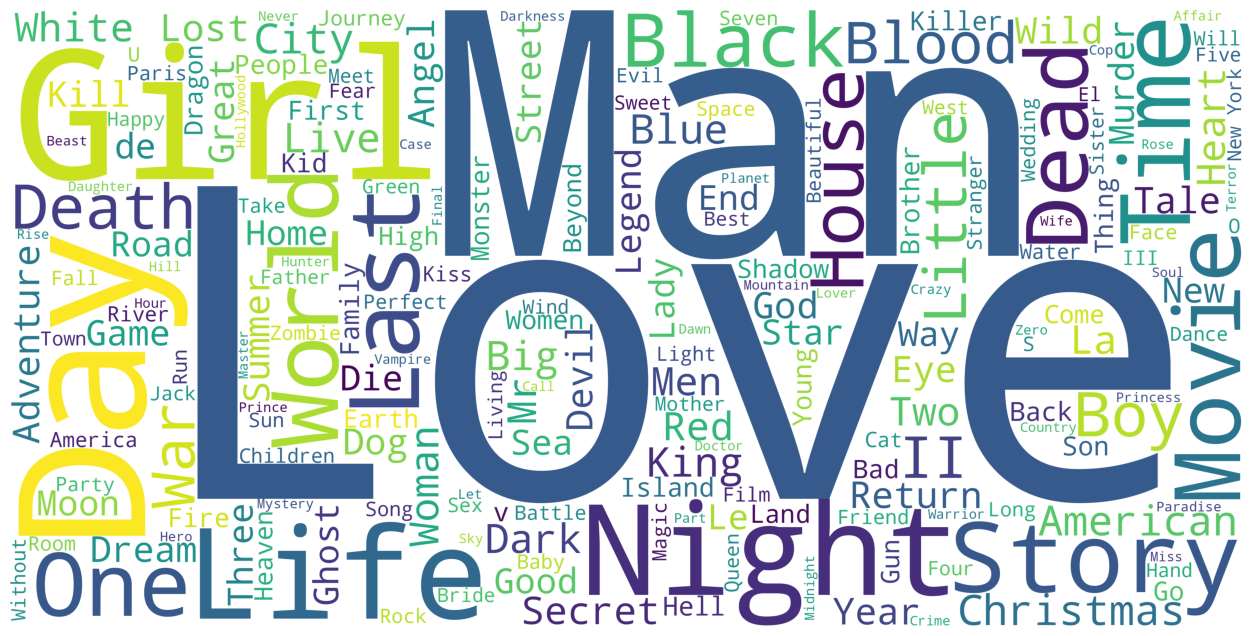

In [ ]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

 - WordCloud(...): WordCloud 객체를 생성합니다. 이 객체는 단어 구름을 생성하는 데 사용됩니다.
 - stopwords=STOPWORDS: STOPWORDS는 단어 구름에서 무시할 단어 목록을 지정합니다. 일반적으로 자주 등장하지만 분석에 불필요한 단어들(예: "the", "and")을 포함합니다.
 - background_color='white': 단어 구름의 배경 색상을 흰색으로 설정합니다.
 - height=2000, width=4000: 단어 구름의 이미지 크기를 설정합니다.
 - .generate(title_corpus): title_corpus에서 단어 구름을 생성합니다


  - STOPWORDS는 WordCloud 라이브러리에 기본적으로 포함되어 있는 불용어 목록입니다. 이 목록은 자주 등장하지만 분석에 별로 도움이 되지 않는 단어들(예: "the", "and", "of")을 포함하고 있습니다.

The word Love is the most commonly used word in movie titles. Girl, Day and Man are also among the most commonly occuring words. I think this encapsulates the idea of the ubiquitious presence of romance in movies pretty well.


"Love"는 영화 제목에서 가장 자주 사용되는 단어입니다. "Girl", "Day", "Man"도 가장 자주 등장하는 단어들 중 하나입니다. 이는 영화에서 로맨스의 보편적인 존재감을 잘 보여주는 것 같습니다.

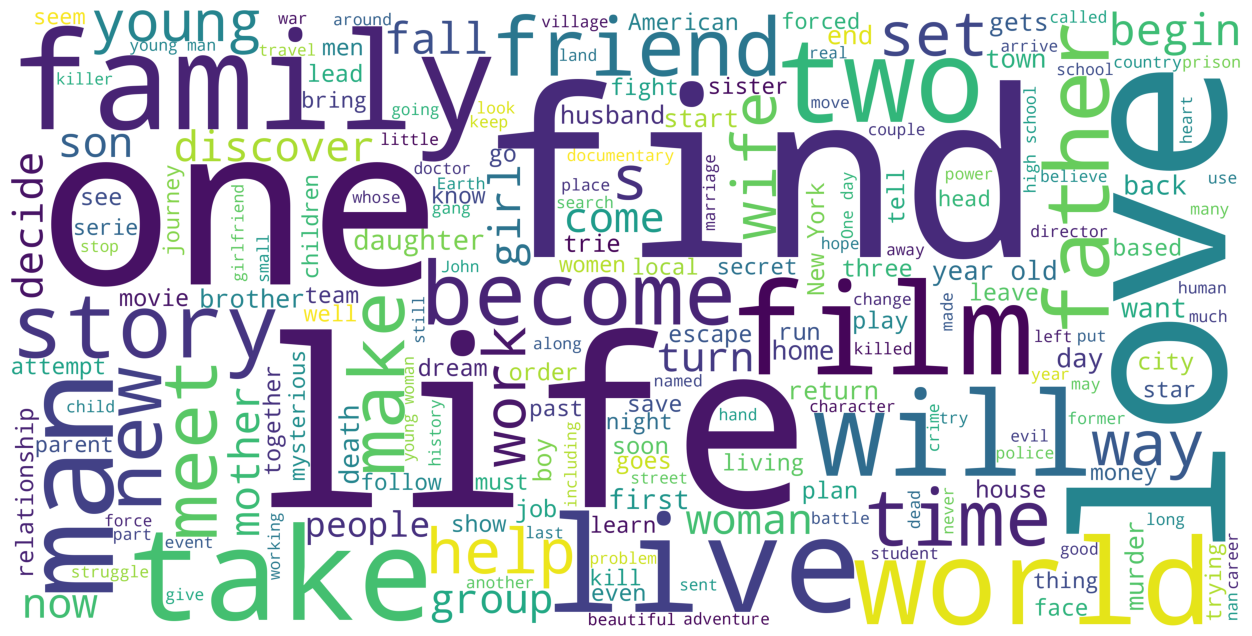

In [ ]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

Life is the most commonly used word in Movie titles. One and Find are also popular in Movie Blurbs. Together with Love, Man and Girl, these wordclouds give us a pretty good idea of the most popular themes present in movies.


"Life"는 영화 제목에서 가장 자주 사용되는 단어입니다. "One"과 "Find"는 영화 개요(Blurbs)에서 자주 등장하는 단어입니다. "Love", "Man", "Girl"과 함께, 이러한 단어 구름은 영화에서 가장 인기 있는 테마를 잘 보여줍니다.

## Production Countries
The Full MovieLens Dataset consists of movies that are overwhelmingly in the English language (more than 31000). However, these movies may have shot in various locations around the world. It would be interesting to see which countries serve as the most popular destinations for shooting movies by filmmakers, especially those in the United States of America and the United Kingdom.

## 제작 국가
전체 MovieLens 데이터셋은 영어로 제작된 영화가 압도적으로 많습니다(31,000편 이상). 그러나 이러한 영화들은 전 세계 다양한 장소에서 촬영되었을 수 있습니다. 미국과 영국의 영화 제작자들이 선호하는 촬영지 국가를 살펴보는 것은 특히 흥미로울 것입니다.

In [ ]:
df['production_countries'] = df['production_countries'].fillna('[]').apply(ast.literal_eval)
df['production_countries'] = df['production_countries'] \
  .apply(lambda x :[i['name'] for i in x] if isinstance(x, list)else [])

In [ ]:
s = df.apply(lambda x: pd.Series(x['production_countries']), axis=1).stack() \
  .reset_index(level=1, drop=True)
s.name = 'countries'

In [ ]:
con_df = df.drop('production_countries', axis=1).join(s)
con_df = pd.DataFrame(con_df['countries'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['num_movies', 'country']
con_df = con_df.reset_index(drop=True)
con_df.head(10)

,num_movies,country
0,21153,United States of America
1,4094,United Kingdom
2,3940,France
3,2254,Germany
4,2169,Italy
5,1765,Canada
6,1648,Japan
7,964,Spain
8,912,Russia
9,828,India


In [ ]:
con_df = con_df[con_df['country'] != 'United States of America']

In [ ]:
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = "colab"

data = [ dict(
    type = 'choropleth',
    locations = con_df['country'],
    locationmode = 'country names',
    z = con_df['num_movies'],
    text = con_df['country'],
    colorscale = [[0, 'rgb(255, 255, 255)'],[1,'rgb(255, 0, 0)']],
    autocolorscale = False,
    reversescale = False,
    marker = dict(
        line = dict (
            color = 'rgb(180, 180, 180)',
            width = 0.5
        )
    ),
    colorbar = dict(
        tickprefix = '',
        title = 'Production Countries'
    ),
)]

layout = dict(
    title = 'Production Countries for the MovieLens Movies (Apart from US)',
    geo = dict(
      showframe = False,
      showcoastlines = False,
      projection = dict(
          type = 'mercator'
      )
    ),
    width = 1200,
    height = 800
)

'''
원래 캐글 코드
# fig = dict(data=data, layout=layout)
# py.iplot( fig, validate=False, filename='d3-world-map' )
'''

'''
헛소리하는 GPT 코드
# # Plotly를 사용하여 그래프를 출력
# go.Figure(fig).show()

# Plotly를 사용하여 그래프를 출력
# pyo.iplot(fig)
'''
fig = go.Figure(data=data, layout=layout)
fig.show()

Unsurprisingly, the United States is the most popular destination of production for movies given that our dataset largely consists of English movies. Europe is also an extremely popular location with the UK, France, Germany and Italy in the top 5. Japan and India are the most popular Asian countries when it comes to movie production.



당연히, 데이터셋이 주로 영어 영화로 구성되어 있어 미국이 영화 제작의 가장 인기 있는 목적지입니다. 유럽도 매우 인기 있는 장소로, 영국, 프랑스, 독일, 이탈리아가 상위 5위 안에 들어갑니다. 일본과 인도는 영화 제작 측면에서 가장 인기 있는 아시아 국가입니다.

## Franchise Movies

Let us now have a brief look at Franchise movies. I was curious to discover the longest running and the most successful franchises among many other things. Let us wrangle our data to find out!


## 프랜차이즈 영화

이제 프랜차이즈 영화에 대해 간단히 살펴보겠습니다. 저는 여러 가지 중에서 가장 오래 지속되고 가장 성공한 프랜차이즈를 발견하는 것이 궁금했습니다. 데이터를 다뤄서 알아봅시다!

In [ ]:
df_fran = df[df['belongs_to_collection'].notnull()]
df_fran['belongs_to_collection'] = df_fran['belongs_to_collection'] \
  .apply(ast.literal_eval).apply(lambda x:x['name'] if isinstance(x, dict) else np.nan)
df_fran = df_fran[df_fran['belongs_to_collection'].notnull()]

In [ ]:
fran_pivot = df_fran.pivot_table(index='belongs_to_collection',
                                 values='revenue', aggfunc={'revenue' : ['mean','sum','count']}).reset_index()

### Highest Grossing Movie Franchises


### 가장 높은 수익을 올린 영화 프랜차이즈

In [ ]:
fran_pivot.sort_values('sum', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
646,James Bond Collection,26,2.733450e+08,7.106970e+09
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09
1550,Transformers Collection,5,8.732202e+08,4.366101e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
1491,The Twilight Collection,5,6.684215e+08,3.342107e+09
610,Ice Age Collection,5,6.433417e+08,3.216709e+09
666,Jurassic Park Collection,4,7.578710e+08,3.031484e+09


The Harry Potter Franchise is the most successful movie franchise raking in more than 7.707 billion dollars from 8 movies. The Star Wars Movies come in a close second with a 7.403 billion dollars from 8 movies too. James Bond is third but the franchise has significantly more movies compared to the others in the list and therefore, a much smaller average gross.



해리 포터 프랜차이즈는 8편의 영화로 77억 7천만 달러 이상의 수익을 올리며 가장 성공한 영화 프랜차이즈입니다. 스타워즈 영화는 8편의 영화로 74억 3천만 달러를 벌어들이며 근소한 차이로 2위를 차지했습니다. 제임스 본드는 세 번째로 높은 수익을 올렸지만, 목록에 있는 다른 프랜차이즈들에 비해 영화의 수가 훨씬 많아 평균 수익은 상대적으로 적습니다.

### Most Successful Movie Franchises (by Average Gross)

### 가장 성공한 영화 프랜차이즈 (평균 수익 기준)

We will use the average gross per movie to gauge the success of a movie franchise. However, this is not a very potent metric as the revenues in this dataset have not been adjusted for inflation. Therefore, revenue statistics will tend to strongly favor franchises in the recent times.


영화 프랜차이즈의 성공을 평가하기 위해 영화당 평균 수익을 사용할 것입니다. 하지만, 이 지표는 이 데이터셋의 수익이 물가 상승률을 반영하지 않았기 때문에 아주 강력한 지표는 아닙니다. 따라서, 수익 통계는 최근 시기의 프랜차이즈에 더 유리하게 작용할 것입니다.

In [ ]:
fran_pivot.sort_values('mean', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
112,Avatar Collection,1,2.787965e+09,2.787965e+09
1245,The Avengers Collection,2,1.462481e+09,2.924962e+09
479,Frozen Collection,1,1.274219e+09,1.274219e+09
446,Finding Nemo Collection,2,9.844532e+08,1.968906e+09
1352,The Hobbit Collection,3,9.785078e+08,2.935523e+09
1388,The Lord of the Rings Collection,3,9.721816e+08,2.916545e+09
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09


The Avatar Collection, although just consisting of one movie at the moment, is the most successful franchise of all time with the sole movie raking in close to 3 billion dollars. The Harry Potter franchise is still the most successful franchise with at least 5 movies.


아바타 컬렉션은 현재 하나의 영화만 포함하고 있음에도 불구하고, 단 한 편의 영화로 거의 30억 달러를 벌어들여 역대 가장 성공적인 프랜차이즈입니다. 해리 포터 프랜차이즈는 여전히 최소 5편의 영화를 가진 가장 성공적인 프랜차이즈입니다.

### Longest Running Franchises

### 가장 오래된 프랜차이즈

Finally, in this subsection, let us take a look at the franchises which have stood the test of time and have managed to deliver the largest number of movies under a single banner. This metric is potent in the way that it isn't affected by inflation. However, this does not imply that successful movie franchises tend to have more movies. Some franchises, such as Harry Potter, have a predefined storyline and it wouldn't make sense to produce more movies despite its enormous success.


마지막으로, 이번 하위 섹션에서는 오랜 시간 동안 계속해서 많은 수의 영화를 제작한 프랜차이즈를 살펴보겠습니다. 이 지표는 인플레이션의 영향을 받지 않는다는 점에서 유용합니다. 그러나 이는 성공적인 영화 프랜차이즈가 더 많은 영화를 제작하는 경향이 있다는 것을 의미하지는 않습니다. 예를 들어, 해리 포터와 같은 프랜차이즈는 이미 정해진 스토리라인이 있어 그 엄청난 성공에도 불구하고 더 많은 영화를 제작하는 것이 의미가 없을 것입니다.

In [ ]:
fran_pivot.sort_values('count', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
646,James Bond Collection,26,2.733450e+08,7.106970e+09
473,Friday the 13th Collection,12,3.874155e+07,4.648985e+08
976,Pokémon Collection,11,6.348189e+07,6.983008e+08
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
540,Halloween Collection,8,3.089601e+07,2.471681e+08
29,A Nightmare on Elm Street Collection,8,4.544894e+07,3.635916e+08
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
1432,The Pink Panther (Original) Collection,8,2.055978e+07,1.644782e+08
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
977,Police Academy Collection,7,4.352046e+07,3.046432e+08


The James Bond Movies is the largest franchise ever with over 26 movies released under the banner. Friday the 13th and Pokemon come in at a distant second and third with 12 and 11 movies respectively.

제임스 본 시리즈는 26편 이상의 영화가 제작된 가장 큰 프랜차이즈입니다. '프라이데이 더 13th'와 '포켓몬'은 각각 12편과 11편의 영화로 두 번째와 세 번째에 해당합니다.

### Production Companies

### 제작사

In [ ]:
df['production_companies'] = df['production_companies'].fillna('[]').apply(ast.literal_eval)
df['production_companies'] = df['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [ ]:
s = df.apply(lambda x: pd.Series(x['production_companies']), axis=1).stack().reset_index(level=1, drop=True)
s.name='companies'

In [ ]:
com_df = df.drop('production_companies', axis=1).join(s)

In [ ]:
com_sum = pd.DataFrame(com_df.groupby('companies')['revenue'].sum().sort_values(ascending=False))
com_sum.columns = ['Total']
com_mean = pd.DataFrame(com_df.groupby('companies')['revenue'].mean().sort_values(ascending=False))
com_mean.columns = ['Average']
com_count = pd.DataFrame(com_df.groupby('companies')['revenue'].count().sort_values(ascending=False))
com_count.columns = ['Number']

com_pivot = pd.concat((com_sum, com_mean, com_count), axis=1)

### Highest Earning Production Companies
Let us find out which production companies have earned the most money from the movie making business.

### 가장 많은 수익을 올린 제작사
영화 제작 산업에서 가장 많은 수익을 올린 제작사가 어떤 곳인지 알아보겠습니다.

In [ ]:
com_pivot.sort_values('Total', ascending=False).head(10)

,Total,Average,Number
companies,,,
Warner Bros.,6.352519e+10,1.293792e+08,491
Universal Pictures,5.525919e+10,1.193503e+08,463
Paramount Pictures,4.880819e+10,1.235650e+08,395
Twentieth Century Fox Film Corporation,4.768775e+10,1.398468e+08,341
Walt Disney Pictures,4.083727e+10,2.778046e+08,147
Columbia Pictures,3.227974e+10,1.367785e+08,236
New Line Cinema,2.217339e+10,1.119868e+08,198
Amblin Entertainment,1.734372e+10,2.550547e+08,68
DreamWorks SKG,1.547575e+10,1.984071e+08,78


Warner Bros is the highest earning production company of all time earning a staggering 63.5 billion dollars from close to 500 movies. Universal Pictures and Paramaount Pictures are the second and the third highest earning companies with 55 billion dollars and 48 billion dollars in revenue respectively.



워너 브로스(Warner Bros)는 지금까지 가장 많은 수익을 올린 제작사로, 약 500편의 영화에서 무려 635억 달러를 벌어들였습니다. 유니버설 픽처스(Universal Pictures)와 파라마운트 픽처스(Paramount Pictures)는 각각 550억 달러와 480억 달러의 수익을 올리며 두 번째와 세 번째로 높은 수익을 기록한 제작사입니다.

## Most Succesful Production Companies
Which production companies produce the most succesful movies on average? Let us find out. We will only consider those companies that have made at least 15 movies.


### 가장 성공적인 제작사
어떤 제작사가 평균적으로 가장 성공적인 영화를 제작하는지 알아보겠습니다. 단, 최소 15편 이상의 영화를 제작한 제작사만을 고려하겠습니다.

In [ ]:
com_pivot[com_pivot['Number'] >= 15].sort_values('Average', ascending=False).head(10)

,Total,Average,Number
companies,,,
Pixar Animation Studios,1.118853e+10,6.215852e+08,18
Marvel Studios,1.169964e+10,6.157703e+08,19
Revolution Sun Studios,8.120339e+09,5.413559e+08,15
Lucasfilm,9.898421e+09,4.499282e+08,22
DreamWorks Animation,1.370752e+10,4.031622e+08,34
DC Entertainment,6.212609e+09,3.882880e+08,16
Dentsu,6.853205e+09,3.807336e+08,18
Jerry Bruckheimer Films,8.957441e+09,3.732267e+08,24
Marvel Enterprises,6.538067e+09,3.441088e+08,19


Pixar Animation Studios has produced the most successful movies, on average. This is not surprising considering the amazing array of movies that it has produced in the last few decades: Up, Finding Nemo, Inside Out, Wall-E, Ratatouille, the Toy Story Franchise, Cars Franchise, etc. Marvel Studios with an average gross of 615 million dollars comes in second with movies such as Iron Man and The Avengers under its banner.


픽사 애니메이션 스튜디오(Pixar Animation Studios)는 평균적으로 가장 성공적인 영화를 제작한 제작사입니다. 이는 최근 몇십 년간 제작한 놀라운 영화들 때문입니다: 《업》, 《니모를 찾아서》, 《인사이드 아웃》, 《월-E》, 《라따뚜이》, 토이 스토리 시리즈, 카스 시리즈 등이 있습니다. 평균 매출 6억 1500만 달러를 기록한 마블 스튜디오(Marvel Studios)가 두 번째로 성공적인 제작사입니다. 아이언맨과 어벤져스와 같은 영화들이 그 대표작입니다.

### Original Language
In this section, let us look at the languages of the movies in our dataset. From the production countries, we have already deduced that the majority of the movies in the dataset ar English. Let us see what the other major languages represented are.


### 원어 (Original Language)
이번 섹션에서는 데이터셋에 포함된 영화들의 언어를 살펴보겠습니다. 제작 국가에서 이미 대부분의 영화가 영어로 되어 있다는 것을 알 수 있었습니다. 이제 다른 주요 언어들이 어떤 것들이 있는지 알아보겠습니다.

In [ ]:
df['original_language'].drop_duplicates().shape[0]

93

In [ ]:
lang_df = pd.DataFrame(df['original_language'].value_counts())
lang_df['language'] = lang_df.index
lang_df.columns = ['number','language']
lang_df.head()

,number,language
original_language,,
en,32269,en
fr,2438,fr
it,1529,it
ja,1350,ja
de,1080,de


There are over 93 languages represented in our dataset. As we had expected, English language films form the overwhelmingly majority. French and Italian movies come at a very distant second and third respectively. Let us represent the most popular languages (apart from English) in the form of a bar plot.


우리 데이터셋에는 93개 이상의 언어가 포함되어 있습니다. 예상한 대로 영어 영화가 압도적으로 많습니다. 프랑스어와 이탈리아어 영화가 각각 매우 먼 순위로 두 번째와 세 번째를 차지합니다. 영어를 제외한 가장 인기 있는 언어들을 막대 그래프 형태로 시각화해 보겠습니다.

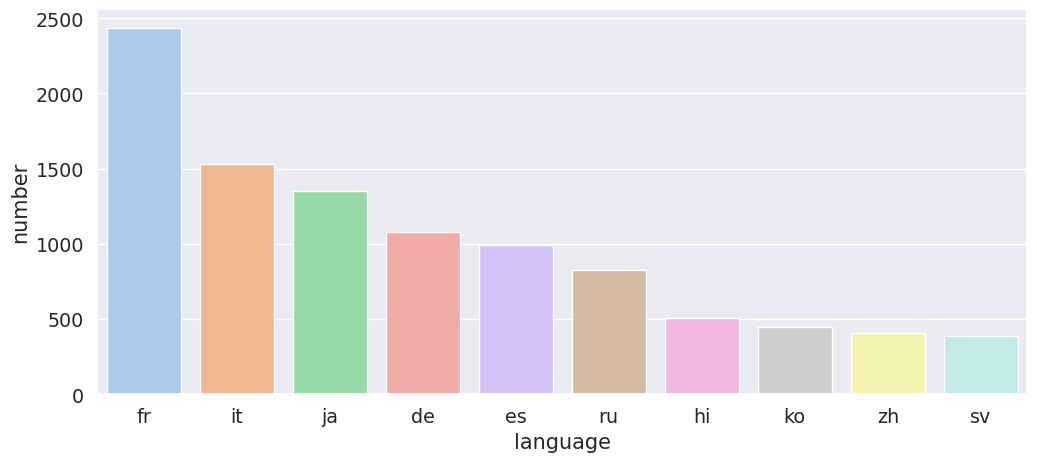

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x='language', y='number', data=lang_df.iloc[1:11], palette='pastel')
plt.show()

As mentioned earlier, French and Italian are the most commonly occurring languages after English. Japanese and Hindi form the majority as far as Asian Languages are concerned.


앞서 언급한 바와 같이, 프랑스어와 이탈리아어는 영어 다음으로 가장 많이 발생하는 언어입니다. 일본어와 힌디어는 아시아 언어 중에서 가장 많이 사용되는 언어들입니다.

### Popularity, Vote Average and Vote Count
In this section, we will work with metrics provided to us by TMDB users. We will try to gain a deeper understanding of the popularity, vote average and vote count features and try and deduce any relationships between them as well as other numeric features such as budget and revenue.


### 인기, 평균 평점 및 투표 수
이 섹션에서는 TMDB 사용자들이 제공한 메트릭을 사용하여 분석을 진행합니다. 인기, 평균 평점, 투표 수와 같은 특성을 자세히 살펴보고, 이들과 예산 및 수익과 같은 다른 숫자 특성 간의 관계를 추론해보겠습니다.

In [ ]:
def clean_numeric(x):
  try:
    return float(x)
  except:
    return np.nan